In [0]:
import pandas as pd
import numpy as np 

import matplotlib as mp
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

import seaborn as sns
sns.set(style="whitegrid")
sns.set(font_scale=2)

In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
from google.cloud import bigquery
client = bigquery.Client('thesisprojects2019')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Driving Distance - Plots

### Violin Plot for each event

In [0]:
# DRIVING DISTANCE
# create and import statistic table from bigquery

query = """ SELECT b.venueid, a.eventid, b.event, a.driving_dist_km, a.count_spectators, ROUND(((a.count_spectators/b.spect_dist_time_travel_defined)*100),2) as perc_spectators
                 FROM (
                            SELECT a.eventid, ROUND(driving_dist_km/1,0)*1 as driving_dist_km, COUNT(1) as count_spectators
                            FROM(             
                                         SELECT * 
                                         FROM `thesisprojects2019.audeMS.prediction_spectators_final` 
                                         WHERE postcode != 'undefined' ) as a
                            GROUP BY eventid, driving_dist_km ) as a
                 RIGHT JOIN `thesisprojects2019.audeMS.EDA_spectators` as b
                 ON a.eventid = b.eventid
                 ORDER BY eventid, driving_dist_km"""
data = client.query(query).to_dataframe()

In [0]:
# DRIVING DISTANCE
# create and import statistic table from bigquery

query = """ SELECT venueid, event, eventid, driving_dist_km 
                 FROM `thesisprojects2019.audeMS.prediction_spectators_final` 
                 WHERE postcode != 'undefined' 
                 ORDER BY eventid, driving_dist_km"""
data = client.query(query).to_dataframe()

In [0]:
data.head(2)

,venueid,event,eventid,driving_dist_km
0,1,Barbarians New Zealand,1_2017-11-04,0.498
1,1,Barbarians New Zealand,1_2017-11-04,0.810


In [0]:
# create space between stadium
data1 = data[data['venueid']==1]
new_data1 = pd.DataFrame([[0] * len(data.columns)], columns=data.columns)
data1 = data1.append(new_data1, ignore_index=True)
data1 = data1.replace({'event':0},{'event':'-'})

data2 = data[data['venueid']==2]
new_data2 = pd.DataFrame([[0] * len(data.columns)], columns=data.columns)
data2 = data2.append(new_data2, ignore_index=True)
data2 = data2.replace({'event':0},{'event':'--'})

data3 = data[data['venueid']==3]
new_data3 = pd.DataFrame([[0] * len(data.columns)], columns=data.columns)
data3 = data3.append(new_data3, ignore_index=True)
data3 = data3.replace({'event':0},{'event':'---'})

data4 = data[data['venueid']==4]

list_df = [data2,data3,data4]
new_data = data1.append(list_df,ignore_index=True )

In [0]:
event_list = []
for i in new_data.event:
    if i not in event_list:
        event_list.append(i)

median_list = []
for i in event_list:
    data_event = new_data.loc[new_data['event'] == i]
    medians_event = data_event.driving_dist_km.median()
    median_list.append(medians_event)

means_list = []
for i in event_list:
    data_event = new_data.loc[new_data['event']==i]
    mean_event = data_event.driving_dist_km.mean()
    means_list.append(mean_event)

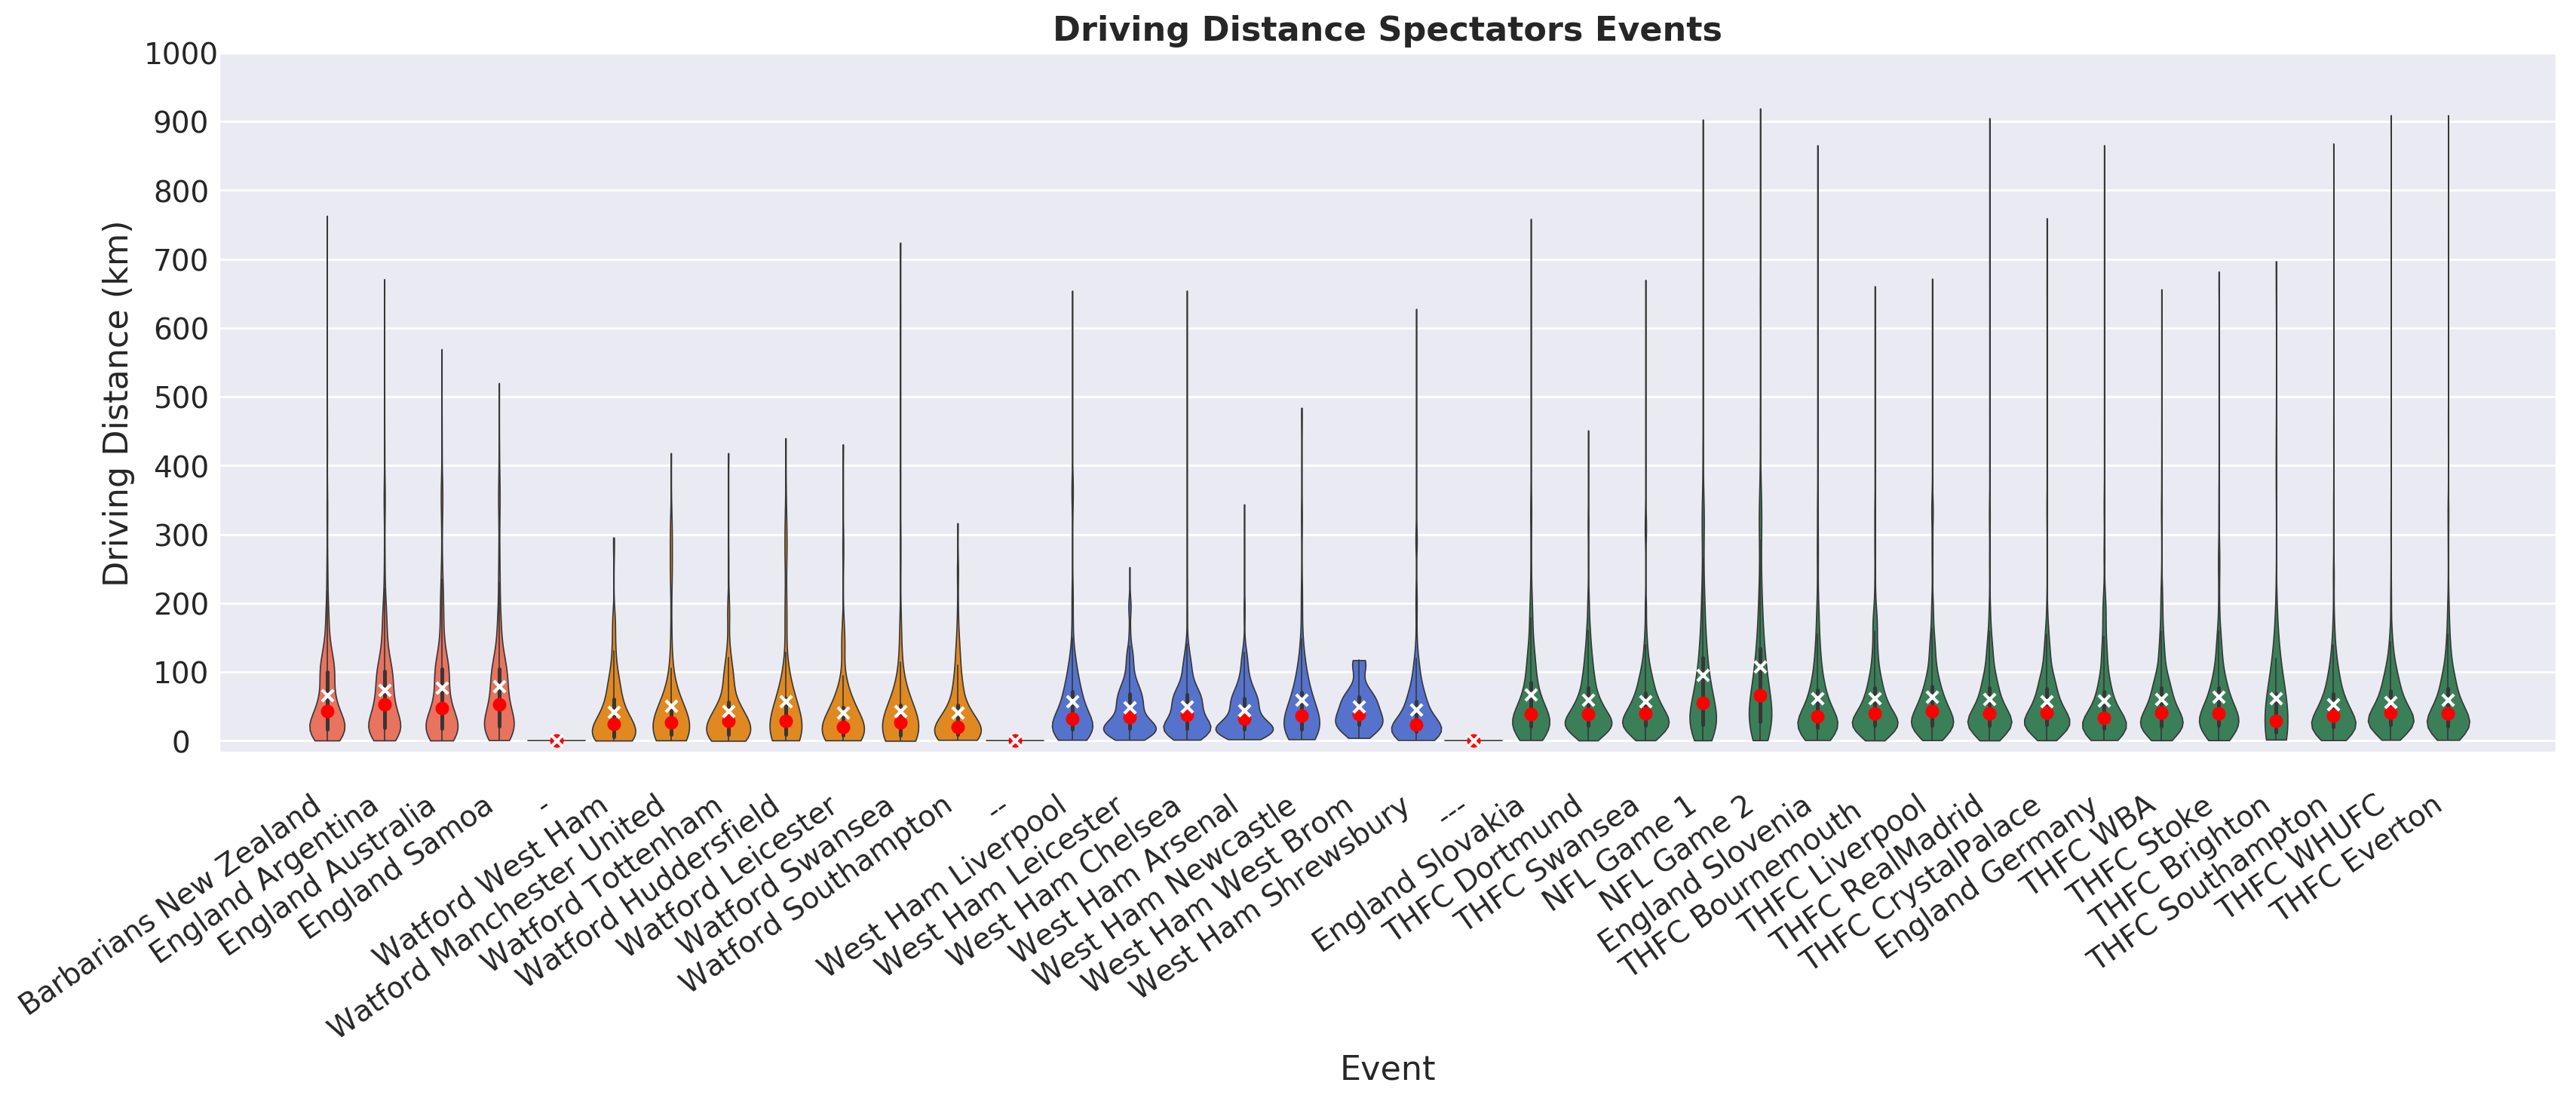

In [0]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 8) ,dpi=200)
#f, ax = plt.subplots(figsize=(18, 8))

col_pal = ['tomato','tomato','tomato','tomato','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange',
           'royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen',
          'seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen']



sns.violinplot(new_data['event'], y=new_data['driving_dist_km'], linewidth=0.6, width=1.0,  cut=0, palette=col_pal)

plt.title('Driving Distance Spectators Events', horizontalalignment='center', fontsize='16',fontweight='bold')
plt.xlabel('Event',fontsize='16', horizontalalignment='center')
plt.ylabel('Driving Distance (km)',fontsize='16', horizontalalignment='center')
plt.xticks(rotation=35, horizontalalignment='right', fontsize='14')
plt.yticks(horizontalalignment='center', fontsize='14')

medians = median_list
means = means_list
inds = np.arange(1, len(medians) + 1)

ax.tick_params(axis='both', which='major', pad=12)
ax.scatter(event_list, medians, marker='o', color='red', s=30, zorder=3)
ax.scatter(event_list, means, marker='x', color='white', s=30, zorder=3)
ax.set_yticks(np.arange(0,1010,100))

plt.subplots_adjust(bottom=0.30)

plt.savefig('drive/My Drive/Dan - Meetings/Thesis Maps & Graphs/Graphs/graph_driving_distance_eventype_1000km.png')

### Violin Plot for each event type and stadium venues

Event Type: Rugby, NFL, International football, Champions League, Premier League

Stadium Venue: London, Watford, Wembley, Twickenham

In [0]:
# DRIVING DISTANCE
# create and import statistic table from bigquery
query = """SELECT a.venue, a.event_type, a.driving_dist_km, a.count_spectators, ROUND(((a.count_spectators/b.count_spect)*100),2) as perc_spectators
                FROM (
                            SELECT a.venue, a.event_type, ROUND(driving_dist_km/1,0)*1 as driving_dist_km, COUNT(1) as count_spectators
                            FROM(              
                                        SELECT b.event_type, a.venue, a.eventid, a.event, a.driving_dist_km
                                        FROM (
                                                    SELECT a.venue, a.eventid, b.event, a.driving_dist_km
                                                    FROM (
                                                               SELECT DISTINCT venue, eventid, user_id, driving_dist_km
                                                               FROM `thesisprojects2019.audeMS.prediction_spectators_final` 
                                                               WHERE driving_dist_km IS NOT NULL ) as a,
                                                               `thesisprojects2019.audeMS.EDA_spectators` as b
                                                    WHERE a.eventid = b.eventid ) as a,
                                                    `thesisprojects2019.audeMS.stadia_event_classification` as b
                                                    WHERE a.eventid = b.eventid AND a.venue = b.venue
                                                    AND a.event = b.event ) as a
                            GROUP BY venue, event_type, driving_dist_km  ) as a  
                RIGHT JOIN `thesisprojects2019.audeMS.eventtype_count_spectators`as b
                ON a.event_type = b.event_type AND a.venue = b.venue
                ORDER BY venue, event_type, driving_dist_km """
data = client.query(query).to_dataframe()

In [0]:
# DRIVING DISTANCE
# create and import statistic table from bigquery

query = """ SELECT venueid, event, eventid, event_type, venue, driving_dist_km 
                 FROM `thesisprojects2019.audeMS.prediction_spectators_final` 
                 WHERE postcode != 'undefined' 
                 ORDER BY eventid, driving_dist_km"""
data = client.query(query).to_dataframe()

In [0]:
data['venue_eventtype'] = data[['event_type', 'venue']].apply(lambda x: ' - '.join(x), axis=1)
data.head(2)

,venueid,event,eventid,event_type,venue,driving_dist_km,venue_eventtype
0,1,Barbarians New Zealand,1_2017-11-04,Rugby International,twickenham,0.498,Rugby International - twickenham
1,1,Barbarians New Zealand,1_2017-11-04,Rugby International,twickenham,0.810,Rugby International - twickenham


In [0]:
data.groupby('venue_eventtype')['driving_dist_km'].mean()

venue_eventtype
Champions League - wembley stadium           60.279490
International Football - wembley stadium     62.092102
NFL - wembley stadium                       100.763269
Premier League - london stadium              49.902687
Premier League - vicarage road               45.919093
Premier League - wembley stadium             59.761084
Rugby International - twickenham             75.126446
Name: driving_dist_km, dtype: float64

In [0]:
venue_eventtype_list = []
for i in data.venue_eventtype:
    if i not in venue_eventtype_list:
        venue_eventtype_list.append(i)

median_list = []
for i in venue_eventtype_list:
    data_event = data.loc[data['venue_eventtype']==i]
    median_event = data_event.avg_dwelltime_min.median()
    median_list.append(median_event)
    
means_list = []
for i in venue_eventtype_list:
    data_event = data.loc[data['venue_eventtype']==i]
    mean_event = data_event.avg_dwelltime_min.mean()
    means_list.append(mean_event)

In [0]:
# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(16, 8) ,dpi=100)
#f, ax = plt.subplots(figsize=(12, 8))

col_pal =['cornflowerblue','tomato','cornflowerblue','seagreen','darkorange','gold','cornflowerblue']

sns.violinplot(data['venue_eventtype'], y=data['driving_dist_km'], linewidth=0.6, width=0.72, cut=0, palette=col_pal)

plt.title('Spectators Dwelling Time', horizontalalignment='center', fontsize='14',fontweight='bold')
plt.xlabel('Event Type & Venue ',fontsize='14', horizontalalignment='center')
plt.ylabel('Driving Distance (km)',fontsize='14', horizontalalignment='center')
plt.xticks(rotation=20, horizontalalignment='right', fontsize='10')
plt.yticks(horizontalalignment='center', fontsize='13')

medians = median_list
means = means_list
inds = np.arange(1, len(medians) + 1)

ax.tick_params(axis='both', which='major', pad=11)
ax.scatter(venue_eventtype_list, medians, marker='o', color='red', s=30, zorder=3)
ax.scatter(venue_eventtype_list, means, marker='x', color='white', s=30, zorder=3)
ax.set_yticks(np.arange(0,500,60))

plt.subplots_adjust(bottom=0.30)

plt.savefig('drive/My Drive/Dan - Meetings/Thesis Maps & Graphs/Graphs/graph_driving_distance.png')